In [1]:
# Reference Tutorials:
# 1. http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/01_Image_Basics.html
# 2. https://simpleitk-prototype.readthedocs.io/en/latest/user_guide/myshow.html
# 3. https://simpleitk-prototype.readthedocs.io/en/latest/user_guide/visualization/plot_vis3dimage.html

from __future__ import print_function
import importlib
from distutils.version import LooseVersion

# check that all packages are installed (see requirements.txt file)
required_packages = {'jupyter', 
                     'numpy',
                     'matplotlib',
                     'ipywidgets',
                     'scipy',
                     'pandas',
                     'SimpleITK'
                    }

problem_packages = list()
# Iterate over the required packages: If the package is not installed
# ignore the exception. 
for package in required_packages:
    try:
        p = importlib.import_module(package)        
    except ImportError:
        problem_packages.append(package)
    
if len(problem_packages) is 0:
    print('All is well.')
else:
    print('The following packages are required but not installed: ' \
          + ', '.join(problem_packages))

All is well.


In [2]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
print(sitk.Version())

SimpleITK Version: 1.2.0 (ITK 4.13)
Compiled: Jan  3 2019 21:33:26



In [5]:
# replace the image path with your own
heart = sitk.ReadImage("../DET0028801LA1.nii")
size = heart.GetSize()

RuntimeError: Exception thrown in SimpleITK ReadImage: /scratch/dashboard/SimpleITK-OSX10.6-x86_64-pkg/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:99:
sitk::ERROR: The file "../DET0028801LA1.nii" does not exist.

In [3]:
# print basic statistics of the image
print(heart.GetSize())
print(heart.GetOrigin())
print(heart.GetSpacing())
print(heart.GetDirection())
print(heart.GetNumberOfComponentsPerPixel())

NameError: name 'heart' is not defined

In [ ]:
print(heart)

In [3]:
# Code from https://simpleitk-prototype.readthedocs.io/en/latest/user_guide/myshow.html
def myshow(img,title=None, margin=0.05, dpi=80):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()

    if nda.ndim == 3:
        # fastest dim, either component or x
        c = nda.shape[-1]

        # the the number of components is 3 or 4 consider it an RGB image
        if c not in (3, 4):
            nda = nda[nda.shape[0] // 2, :, :]

    elif nda.ndim == 4:
        c = nda.shape[-1]

        if c not in (3, 4):
            raise RuntimeError("Unable to show 3D-vector Image")

        # take a z-slice
        nda = nda[nda.shape[0] // 2, :, :, :]

    xsize = nda.shape[1]
    ysize = nda.shape[0]

    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * xsize / dpi, (1 + margin) * ysize / dpi

    plt.figure(figsize=figsize, dpi=dpi, tight_layout=True)
    ax = plt.gca()

    extent = (0, xsize * spacing[0], ysize * spacing[1], 0)

    t = ax.imshow(nda, extent=extent, interpolation=None)

    if nda.ndim == 2:
        t.set_cmap("gray")

    if(title):
        plt.title(title)

    return plt.figure()


def myshow3d(img, xslices=[], yslices=[], zslices=[], title=None, margin=0.05,
             dpi=80):
    img_xslices = [img[s, :, :] for s in xslices]
    img_yslices = [img[:, s, :] for s in yslices]
    img_zslices = [img[:, :, s] for s in zslices]

    maxlen = max(len(img_xslices), len(img_yslices), len(img_zslices))

    img_null = sitk.Image([0, 0], img.GetPixelID(),
                          img.GetNumberOfComponentsPerPixel())

    img_slices = []
    d = 0

    if len(img_xslices):
        img_slices += img_xslices + [img_null] * (maxlen - len(img_xslices))
        d += 1

    if len(img_yslices):
        img_slices += img_yslices + [img_null] * (maxlen - len(img_yslices))
        d += 1

    if len(img_zslices):
        img_slices += img_zslices + [img_null] * (maxlen - len(img_zslices))
        d += 1

    if maxlen != 0:
        if img.GetNumberOfComponentsPerPixel() == 1:
            img = sitk.Tile(img_slices, [maxlen, d])
        # TO DO check in code to get Tile Filter working with vector images
        else:
            img_comps = []
            for i in range(0, img.GetNumberOfComponentsPerPixel()):
                img_slices_c = [sitk.VectorIndexSelectionCast(s, i)
                                for s in img_slices]
                img_comps.append(sitk.Tile(img_slices_c, [maxlen, d]))
            img = sitk.Compose(img_comps)

    myshow(img, title, margin, dpi)



In [ ]:
heart_img = myshow3d(heart, yslices=range(50, size[1] - 50, 20),
         zslices=range(50, size[2] - 50, 20), dpi=100)

In [ ]:
heart_label = sitk.ReadImage('truth/training_axial_crop_pat9-label.nii')
size = heart_label.GetSize()

In [ ]:
label_plt = myshow3d(sitk.LabelToRGB(heart_label), yslices=range(50, size[1] - 50, 20),
         zslices=range(50, size[2] - 50, 20), dpi=100)



(192, 192, 10)
(256, 256, 12)
(192, 192, 10)


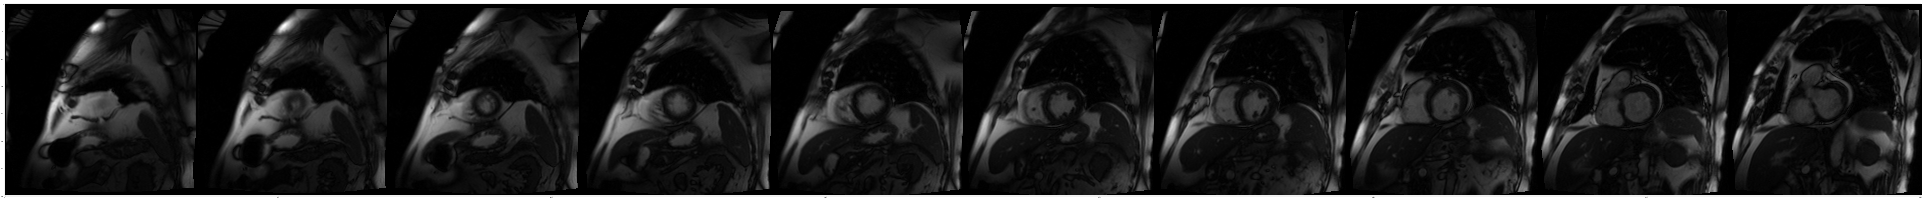

<Figure size 432x288 with 0 Axes>

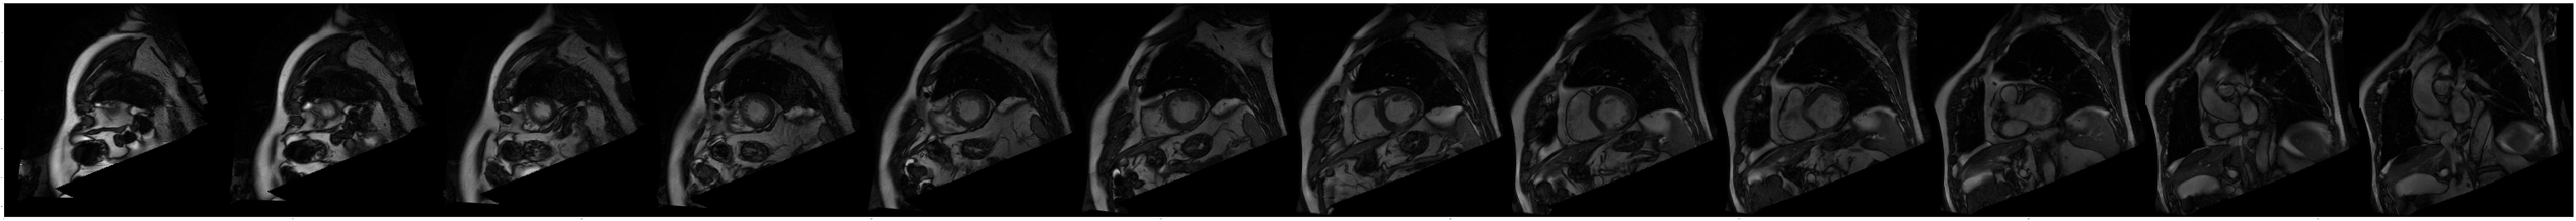

<Figure size 432x288 with 0 Axes>

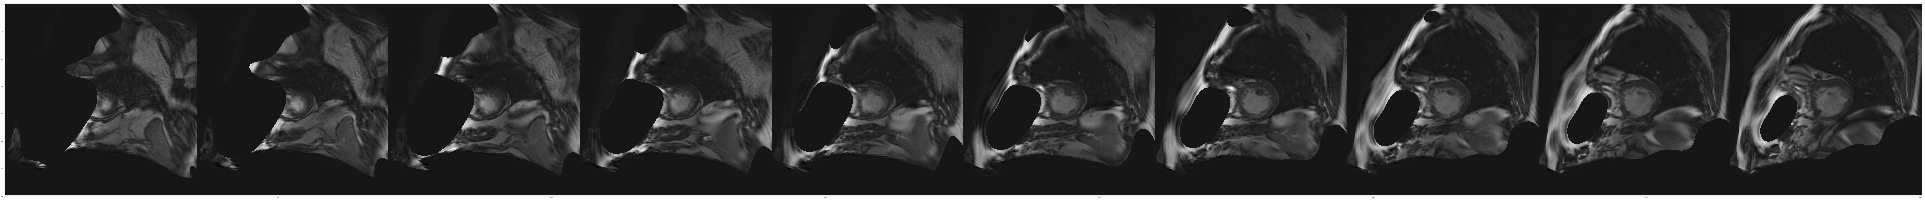

<Figure size 432x288 with 0 Axes>

In [24]:
import SimpleITK as sitk
import os

#filenames = ["../DET0001201SA1.nii", "../DET0001201SA2.nii", "../DET0001201SA3.nii",
#           "../DET0001201SA4.nii", "../DET0001201SA5.nii", "../DET0001201SA6.nii",
#           "../DET0001201SA7.nii", "../DET0001201SA8.nii", "../DET0001201SA9.nii", 
#           "../DET0001201SA10.nii", "../DET0001201SA11.nii", "../DET0001201SA12.nii"]
#filenames = ["../code4step2/trans_old.nii","../code4step2/training_axial_crop_pat2.nii", "../code4step2/training_axial_crop_pat0.nii"]
#filenames = ["../code4step2/DET0005601SA7.nii", "../code4step2/trans.nii", "../code4step2/DET0005801SA4.nii", "../code4step2/DET0005801SA5.nii",
#   "../code4step2/19_10reference.nii", "../code4step2/19_10predict.nii", "../code4step2/26_10predict.nii"]#,"../DET0028801LA2_label.nii", "../DET0028801LA3_label.nii"]


filenames = ["/Users/yukeyi/Desktop/brain_data/one_for_each/DET0043501CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0021701CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0015401CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0043501CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0007101CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0005701CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0005601CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0005301CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0004701CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0004201CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0002701CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0002601CT_tslice_0.nii",
            "/Users/yukeyi/Desktop/brain_data/one_for_each/DET0002401CT_tslice_0.nii"] 
filenames = ["/Users/yukeyi/Desktop/90_CT_tslice_0.nii","/Users/yukeyi/Desktop/25_CT_tslice_0.nii","/Users/yukeyi/Desktop/trans.nii"]
#filenames = os.listdir("../data/check_data")
#print(filenames)
#filenames = ["../data/check_data/"+item for item in filenames][:10]
#filenames = ["../data/check_data/DET0001701_ph0.nii","../data/check_data/DET0001801_ph0.nii"]
for name in filenames:
    heart = sitk.ReadImage(name)
    size = heart.GetSize()
    print(size)
    myshow3d(heart, zslices=range(0,size[2],1), dpi=10)

In [8]:
import SimpleITK as sitk

#filenames = ["../DET0001201SA1.nii", "../DET0001201SA2.nii", "../DET0001201SA3.nii",
#           "../DET0001201SA4.nii", "../DET0001201SA5.nii", "../DET0001201SA6.nii",
#           "../DET0001201SA7.nii", "../DET0001201SA8.nii", "../DET0001201SA9.nii", 
#           "../DET0001201SA10.nii", "../DET0001201SA11.nii", "../DET0001201SA12.nii"]
#filenames = ["../result.nii","../training_axial_crop_pat2.nii", "../training_axial_crop_pat0.nii", "../training_axial_crop_pat1.nii"]
filenames = ["../code4step2/37_1reference.nii", "../code4step2/37_1predict.nii"]#,"../DET0028801LA2_label.nii", "../DET0028801LA3_label.nii"]
#filenames = ["../../../code330/MCDS-Capstone/code4step2/DET0045301SA8.nii", "../../../code330/MCDS-Capstone/code4step2/DET0045301SA9.nii"
 #            ,"../../../code330/MCDS-Capstone/code4step2/patch0.nii","../../../code330/MCDS-Capstone/code4step2/patch1.nii"]
for name in filenames:
    heart = sitk.ReadImage(name)
    size = heart.GetSize()
    print(size)
    myshow3d(heart, zslices=range(0,size[2],2), dpi=10)

(96, 32)


IndexError: tuple index out of range

In [ ]:
heartArray = sitk.GetArrayFromImage(heart)
print(heart.GetSize())
print(heartArray.shape)

In [31]:

files= os.listdir("../data/check_data")
print(files)

['DET0026901_ph0.nii', 'DET0035501_ph0.nii', 'DET0002501_ph0.nii', 'DET0003101_ph0.nii', 'DET0015601_ph0.nii', 'DET0014201_ph0.nii', 'DET0005201_ph0.nii', 'DET0002801_ph0.nii', 'DET0004601_ph0.nii', 'DET0024501_ph0.nii', 'DET0040001_ph0.nii', 'DET0001601_ph0.nii', 'DET0000201_ph0.nii', '.DS_Store', 'DET0021501_ph0.nii', 'DET0043501_ph0.nii', 'DET0009001_ph0.nii', 'DET0005901_ph0.nii', 'DET0003701_ph0.nii', 'DET0006101_ph0.nii', 'DET0005401_ph0.nii', 'DET0010601_ph0.nii', 'DET0004001_ph0.nii', 'DET0008901_ph0.nii', 'DET0042601_ph0.nii', 'DET0043201_ph0.nii', 'DET0026801_ph0.nii', 'DET0002401_ph0.nii', 'DET0044801_ph0.nii', 'DET0001101_ph0.nii', 'DET0004701_ph0.nii', 'DET0002901_ph0.nii', 'DET0024401_ph0.nii', 'DET0000801_ph0.nii', 'DET0028601_ph0.nii', 'DET0030901_ph0.nii', 'DET0040101_ph0.nii', 'DET0001701_ph0.nii', 'DET0042001_ph0.nii', 'DET0003601_ph0.nii', 'DET0005801_ph0.nii', 'DET0006001_ph0.nii', 'DET0004101_ph0.nii', 'DET0008801_ph0.nii', 'DET0043901_ph0.nii', 'DET0001201_ph0.ni